In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing 
import seaborn as sns
import cvxopt as co

In [2]:
data = pd.read_csv("winequality-red.csv", sep=";")

print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

C:\Users\76504\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FDC4278>,
      dtype=object)

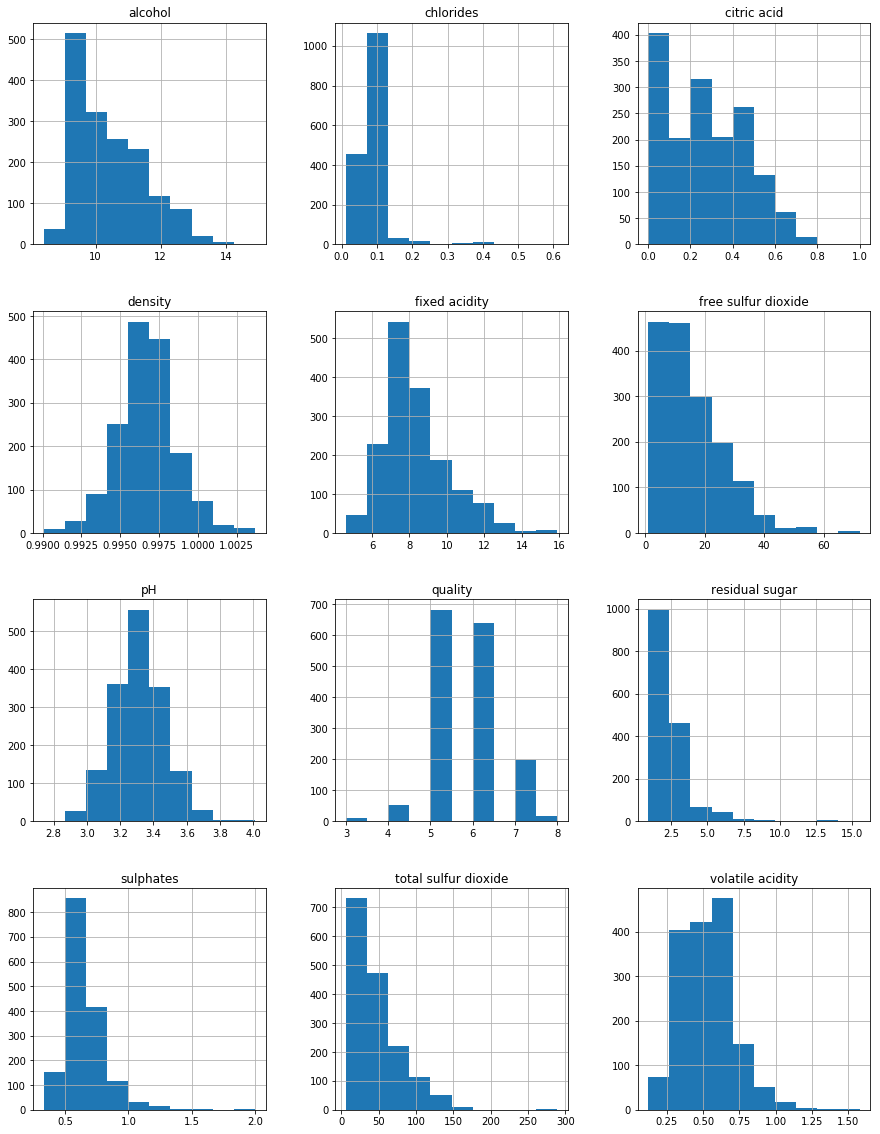

In [24]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
data.hist(ax = ax)

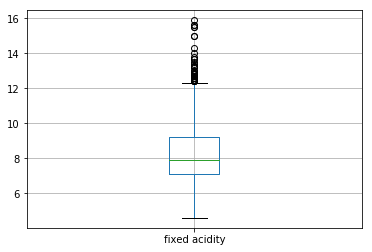

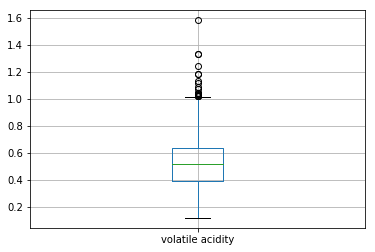

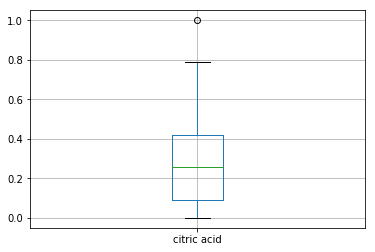

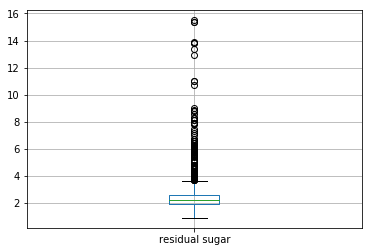

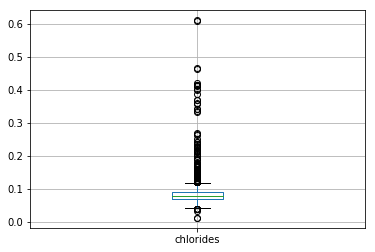

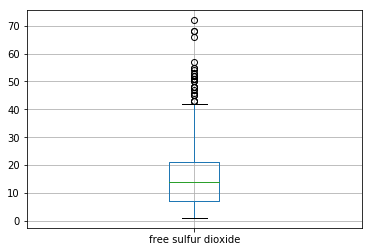

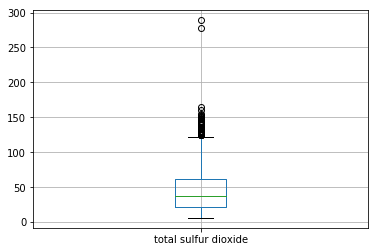

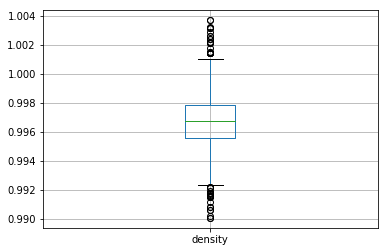

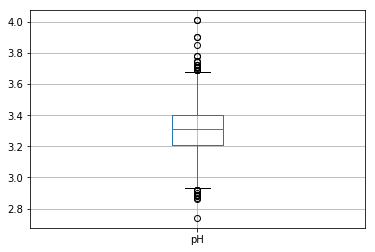

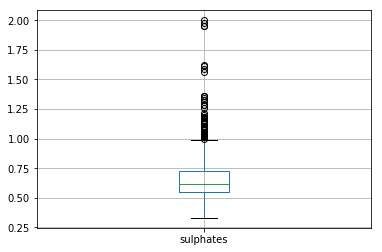

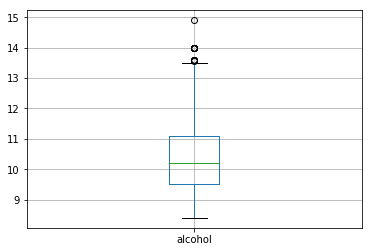

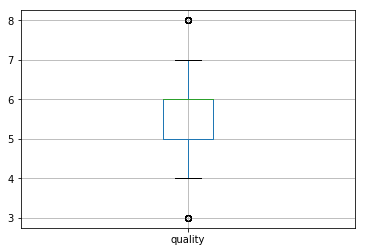

In [36]:
for col in data:
    plt.figure()
    data.boxplot([col])

In [22]:
data_without_quality = data.iloc[:,:-1]
col_drops = []
for col in data.columns:
    print(col)
    print(data[col].corr(data["quality"]))
    print(data[col].cov(data["quality"]))
    if abs(data[col].corr(data["quality"])) < 0.1:
                col_drops.append(col)
print(col_drops)
#     print(data[col].corr(data["quality"]))

fixed acidity
0.12405164911322428
0.17442358764590798
volatile acidity
-0.39055778026400734
-0.05647588331568303
citric acid
0.22637251431804148
0.03561189291492413
residual sugar
0.013731637340066301
0.01563504568327672
chlorides
-0.12890655993005265
-0.004899544928346171
free sulfur dioxide
-0.05065605724427626
-0.4279070695780598
total sulfur dioxide
-0.1851002889265378
-4.91723707166791
density
-0.1749192277833503
-0.0002666037049125689
pH
-0.057731391205382274
-0.007197822324810335
sulphates
0.25139707906926173
0.03441340841154636
alcohol
0.4761663240011363
0.4097890108101041
quality
0.9999999999999982
0.6521683999934241
['residual sugar', 'free sulfur dioxide', 'pH']


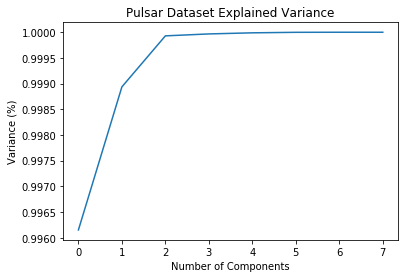

In [15]:
data_without_quality = data.iloc[:,:-1]
data_without_quality = data_without_quality.drop(col_drops, axis=1)
# print(data_without_quality)
pca = PCA().fit(data_without_quality)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [20]:
featureList = list(data)

redWineX = data[[featureList[i] for i in range(len(featureList) - 1)]]
redWineY = data[[featureList[-1]]]

for i in range(len(redWineY)):
    if redWineY.at[i, featureList[-1]] > 5:
        redWineY.at[i, featureList[-1]] = 1
    else:
        redWineY.at[i, featureList[-1]] = -1

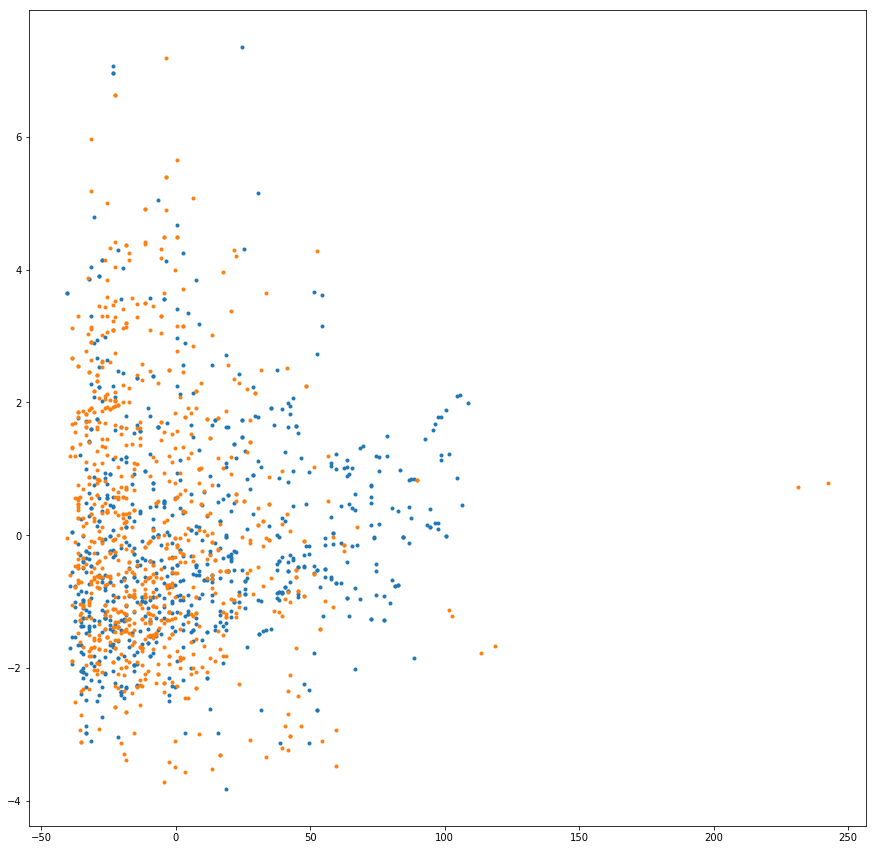

In [21]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_without_quality)
X_trans = pca.transform(data_without_quality)
X_trans = pd.DataFrame(X_trans)
color = redWineY['quality']
X_trans['quality'] = color
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
groups = X_trans.groupby('quality')
for name, group in groups:
    ax.plot(group.iloc[:,0], group.iloc[:,1],marker='o',linestyle='',ms=3, label=name)
plt.show()

In [31]:
def percep_run(L, X, y):
    # Your code goes here
    theta = np.array([0] * len(X[0]))
    for i in range(0, L):
        all_points_classified_correctly = True
        for t in range(0, len(y)):
            if y[t] * np.dot(theta, X[t]) <= 0:
                all_points_classified_correctly = False
                theta = np.add(theta, y[t] * X[t])
        if all_points_classified_correctly:
            return theta, i + 1

    return theta, L
def predict_run(theta, x):
    # Your code goes here
    if np.dot(theta, x) > 0:
        return 1.0
    return -1.0

In [23]:
theta_perceptron, num = percep_run(10,data_without_quality.values,redWineY.values)

In [28]:
X = data_without_quality.values
Y = redWineY.values
y_pred = np.zeros((n,1))
for i in range(n):
    all_except_i = range(i) + range(i+1,n)
    X_train = X[all_except_i]
    y_train = y[all_except_i]
    theta_fold = svm_run(X_train, y_train)
    y_pred[i] = predict_run(theta_fold, X[i])
err = np.mean(y!=y_pred)

NameError: global name 'co' is not defined